In [37]:
import pickle
import xgboost as xgb

import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.datasets import load_iris, load_digits, load_boston

rng = np.random.RandomState(31337)

print("Iris: multiclass classification")
iris = load_iris()
y = iris['target']
X = iris['data']
kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBClassifier(n_jobs=1).fit(X[train_index], y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(confusion_matrix(actuals, predictions))

Iris: multiclass classification
[00:05:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kent/anaconda3/envs/spyder-env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[22  0  0]
 [ 0 21  2]
 [ 0  4 26]]
[00:05:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kent/anaconda3/envs/spyder-env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[28  0  0]
 [ 0 24  3]
 [ 0  1 19]]


In [38]:
for train_index, test_index in kf.split(X):
    print("train_index", train_index)
    print("test_index", test_index)
    print("")
    

train_index [  0   1   2   3   6  10  13  14  16  18  20  22  23  24  25  26  30  31
  32  35  37  38  39  41  43  47  49  50  51  52  55  61  62  63  64  66
  67  70  71  74  77  78  81  82  84  88  89  92  94  96 100 104 105 106
 107 110 115 116 123 124 125 128 129 131 132 133 135 136 139 141 142 144
 145 148 149]
test_index [  4   5   7   8   9  11  12  15  17  19  21  27  28  29  33  34  36  40
  42  44  45  46  48  53  54  56  57  58  59  60  65  68  69  72  73  75
  76  79  80  83  85  86  87  90  91  93  95  97  98  99 101 102 103 108
 109 111 112 113 114 117 118 119 120 121 122 126 127 130 134 137 138 140
 143 146 147]

train_index [  4   5   7   8   9  11  12  15  17  19  21  27  28  29  33  34  36  40
  42  44  45  46  48  53  54  56  57  58  59  60  65  68  69  72  73  75
  76  79  80  83  85  86  87  90  91  93  95  97  98  99 101 102 103 108
 109 111 112 113 114 117 118 119 120 121 122 126 127 130 134 137 138 140
 143 146 147]
test_index [  0   1   2   3   6  10  13  14  1

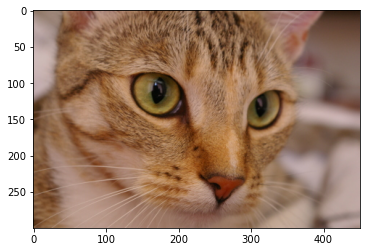

In [39]:
from skimage import data
import matplotlib.pyplot as plt
cat = data.cat()
plt.imshow(cat)

In [40]:
pixel_vals = cat.reshape((-1,3))
pixel_vals

array([[143, 120, 104],
       [143, 120, 104],
       [141, 118, 102],
       ...,
       [161, 137, 127],
       [161, 137, 127],
       [162, 138, 128]], dtype=uint8)

In [41]:
cat_again = pixel_vals.reshape((300,451,3))

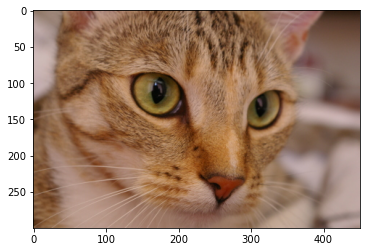

In [42]:
plt.imshow(cat_again)

In [43]:
from sklearn.preprocessing import normalize

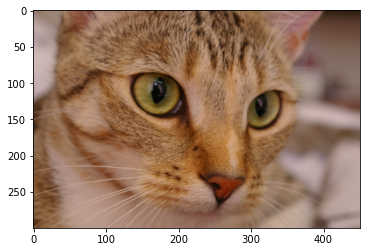

In [44]:
cat_norm = pixel_vals/256
cat_again = cat_norm.reshape((300,451,3))
plt.imshow(cat_again)

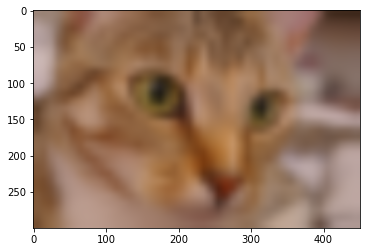

In [81]:
resized = resize(
    
    , (int(300/2), int(451/2)))
cat_again = resize(resized, (300, 451))
plt.imshow(cat_again)

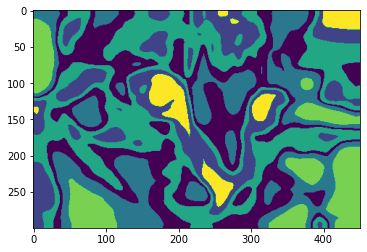

In [83]:
pixel_vals = cat_again.reshape((-1,3))
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0).fit(pixel_vals)
labs = kmeans.labels_
labs = labs.reshape((300,451,1))
plt.imshow(labs)

In [86]:
from skimage import segmentation
# Transform markers image so that 0-valued pixels are to
# be labelled, and -1-valued pixels represent background

labels_rw = segmentation.random_walker(cat_again, labs)
plt.imshow(labels_rw)

ValueError: Incompatible data and labels shapes.

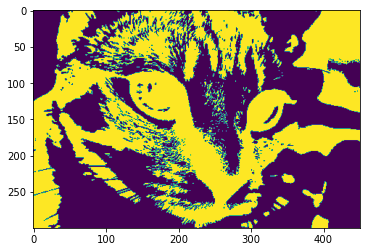

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(cat_norm)
labs = kmeans.labels_
labs = labs.reshape((300,451,1))
plt.imshow(labs)


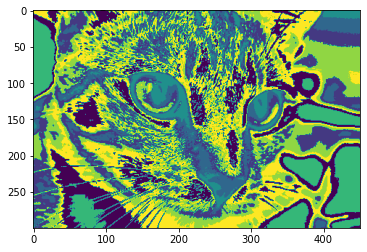

In [46]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(cat_norm)
labs = kmeans.labels_
labs = labs.reshape((300,451,1))
plt.imshow(labs)


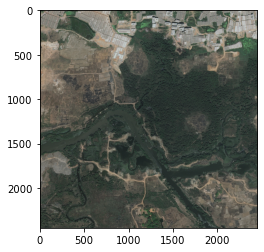

In [47]:
import matplotlib.image as mpimg
image = mpimg.imread("/home/kent/college/data_sets/deepglobe/train/134465_sat.jpg")
plt.imshow(image)

In [48]:
image.shape

(2448, 2448, 3)

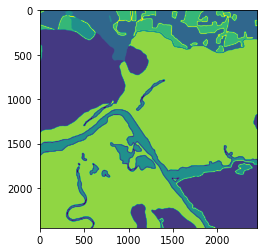

In [68]:
from skimage.transform import resize, rescale
resized = resize(image, (256, 256))
image = resize(resized, (2448, 2448))
pixel_vals = image.reshape((-1,3))
cat_norm = pixel_vals/256


#cat_again = cat_norm.reshape((300,451,3))
kmeans = KMeans(n_clusters=7, random_state=0).fit(cat_norm)
labs = kmeans.labels_
labs = labs.reshape((2448,2448,1))
plt.imshow(labs)

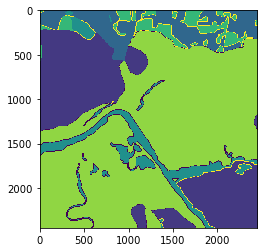

In [69]:
plt.imshow(labs, interpolation='none')

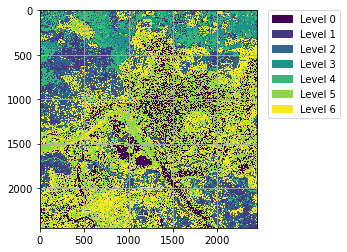

In [51]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
data = labs
values = np.unique(data.ravel())

plt.figure(figsize=(8,4))
im = plt.imshow(data, interpolation='none')

# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="Level {l}".format(l=values[i]) ) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.grid(True)
plt.show()

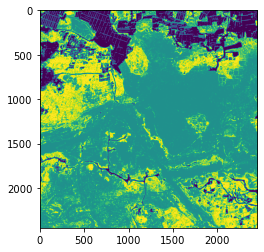

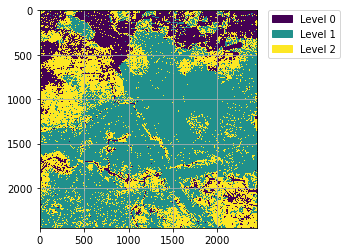

In [57]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(cat_norm)
labs = kmeans.labels_
labs = labs.reshape((2448,2448,1))
plt.imshow(labs)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
data = labs
values = np.unique(data.ravel())

plt.figure(figsize=(8,4))
im = plt.imshow(data, interpolation='none')

# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="Level {l}".format(l=values[i]) ) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.grid(True)
plt.show()

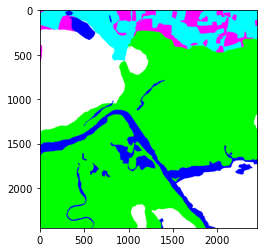

In [52]:
image = mpimg.imread("/home/kent/college/data_sets/deepglobe/train/134465_mask.png")
plt.imshow(image)
yy = image.reshape((-1,3))

In [53]:
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier()
clf = clf.fit(cat_norm,yy)

In [54]:
y_pred = clf.predict(cat_norm)
yy_back = yy.ravel().reshape((2448,2448,3))
y_pred_back = y_pred.ravel().reshape((2448,2448,3))

In [87]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

ValueError: Bilateral filter is not implemented for grayscale images of 3 or more dimensions, but input image has (2448, 2448, 3) dimension. Use ``multichannel=True`` for 2-D RGB images.

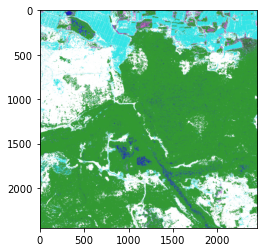

In [95]:
plt.figure()
plt.imshow(denoise_tv_chambolle(y_pred_back, weight=0.1))
plt.figure()
plt.imshow(denoise_bilateral(y_pred_back, sigma_color=0.05, sigma_spatial=15, multichannel=True))
plt.figure()
plt.imshow(denoise_wavelet(y_pred_back, rescale_sigma=True))
plt.figure()
plt.imshow(denoise_tv_chambolle(y_pred_back, weight=0.2))
plt.figure()
plt.imshow(denoise_bilateral(y_pred_back, sigma_color=0.1, sigma_spatial=15,
                ))
plt.figure()
plt.imshow(denoise_wavelet(y_pred_back, convert2ycbcr=True,
                                rescale_sigma=True))

In [93]:
def smooth(img):
    avg_img =(    img[1:-1 ,1:-1]  # center
                + img[ :-2 ,1:-1]  # top
                + img[2:   ,1:-1]  # bottom
                + img[1:-1 , :-2]  # left
                + img[1:-1 ,2:  ]  # right
                ) / 5.0
    return avg_img

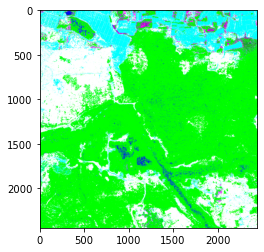

In [94]:
avg_img = smooth(y_pred_back)
plt.imshow(avg_img)

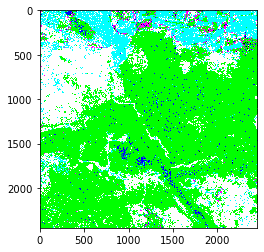

In [56]:
plt.imshow(y_pred_back,  interpolation='none')

In [58]:
from skimage import data
from skimage.exposure import histogram
from skimage import color
grayimage = color.rgb2gray(image)

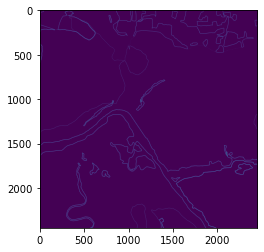

In [59]:
from skimage.filters import sobel

# Apply edge detection filter
edge_sobel = sobel(grayimage)
plt.imshow(edge_sobel)

In [60]:
from scipy import ndimage as ndi
segmentation = ndi.binary_fill_holes(edge_sobel - 1)

In [66]:
from skimage.filters import sobel
elevation_map = sobel(grayimage)
markers = np.zeros_like(grayimage)
markers[grayimage < 30] = 1
markers[grayimage > 150] = 2
from skimage.segmentation import watershed
segmentation = watershed(elevation_map, markers)
segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_coins, _ = ndi.label(segmentation)

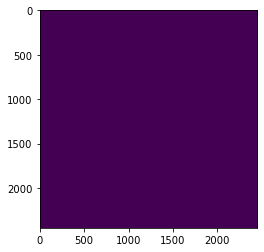

In [67]:
plt.imshow(labeled_coins)